In [2]:
%run C:\Users\GabrielFreitas\Desktop\Python\BerryGarden\blossom

In [28]:
CVI, CE = cb.readCVI(path=r'C:\Users\GabrielFreitas\Desktop\PhD\Data\Raw\Zeppelin\CVI'+'\\',
                     startdate='2020-06-01',
                     enddate='2020-07-01',
                     resample='1H')

31it [00:44,  1.44s/it]


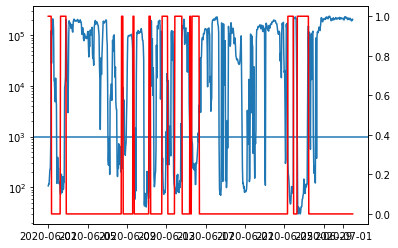

In [29]:
plt.plot(CVI.visiblty)
plt.yscale('log')
plt.axhline(y=1e3)
plt.twinx()
plt.plot(CVI.cloud,color='red')

In [30]:
CE

,S,E,D
0,NaN,2020-06-01 08:00:00,NaT
1,2020-06-02 06:00:00,2020-06-02 20:00:00,0 days 14:00:00
2,2020-06-08 11:00:00,2020-06-08 15:00:00,0 days 04:00:00
3,2020-06-09 15:00:00,2020-06-09 18:00:00,0 days 03:00:00
4,2020-06-11 06:00:00,2020-06-11 10:00:00,0 days 04:00:00
5,2020-06-12 14:00:00,2020-06-13 04:00:00,0 days 14:00:00
6,2020-06-13 21:00:00,2020-06-14 15:00:00,0 days 18:00:00
7,2020-06-15 10:00:00,2020-06-15 12:00:00,0 days 02:00:00
8,2020-06-15 15:00:00,2020-06-16 09:00:00,0 days 18:00:00
9,2020-06-25 09:00:00,2020-06-25 23:00:00,0 days 14:00:00
